# BUSSINESS UNDERSTANDING

model ini dibuat untuk mendapatkan prediksi nilai post test yang akan siswa dapatkan dengan inputan :

pengaturan sekolah, jenis sekolah, metode pengajaran, siswa, jenis kelamin, kualitas makan siang dan pretest 

untuk mengetahui seberapa efektif dan pemahaman siswa dengan jumlah mata pelajaran yang diberikan juga jam belajar yang di tentukan.

In [432]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [433]:
#READ DATA
df = pd.read_csv('test_scores.csv')

# DATA UNDERSTANDING

deskripsi kolom:

school : Nama sekolah

school_setting : pengaturan sekolah

school_type : tipe sekolah

classroom : kelas

teaching_method : metode belajar

n_student : jumlah siswa per kelas

student_id : id siswa

gender : jenis kelamin

lunch : kualitas makan siang

pretest : nilai pretest siswa

posttest : nilai post test siswa

In [434]:
#menampilkan data
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [435]:
#deskripsi jenis data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [436]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
n_student,2133.0,22.796531,4.228893,14.0,20.0,22.0,27.0,31.0
pretest,2133.0,54.955931,13.563101,22.0,44.0,56.0,65.0,93.0
posttest,2133.0,67.102203,13.986789,32.0,56.0,68.0,77.0,100.0


<Axes: >

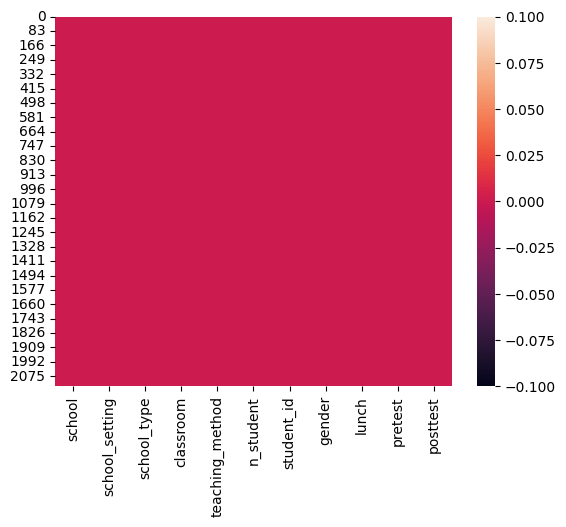

In [437]:
#cek missing data
sns.heatmap(df.isnull())

In [438]:
df.duplicated().sum()

0

C:\Users\lizap\AppData\Local\Temp\ipykernel_29016\3305500440.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

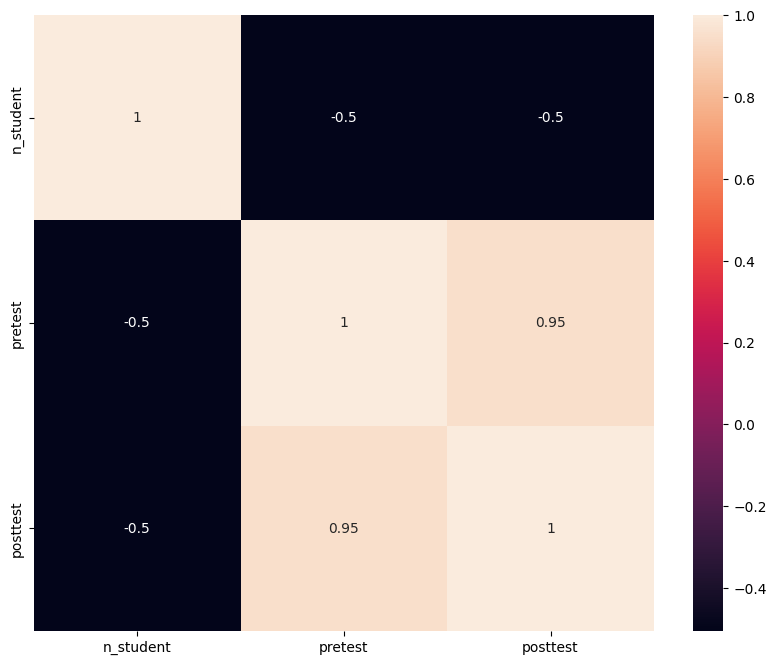

In [439]:
#korelasi data
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# DATA PREPARATION

(array([0, 1, 2]),
 [Text(0, 0, 'Rural'), Text(1, 0, 'Suburban'), Text(2, 0, 'Urban')])

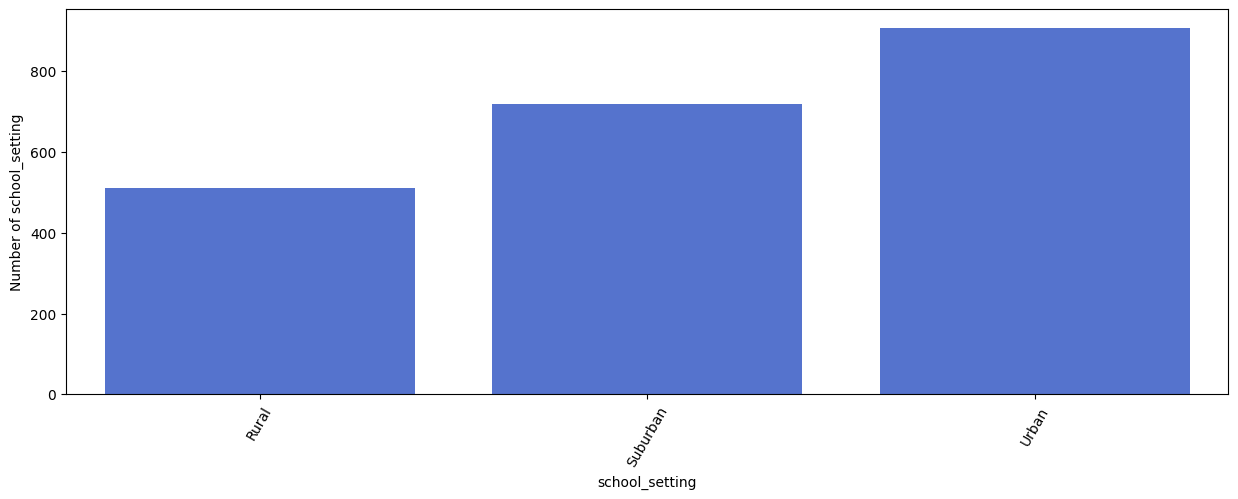

In [440]:
school = df.groupby('school_setting').count()[['lunch']].sort_values(by='lunch',ascending=True).reset_index()
school = school.rename(columns={'lunch':'Number of school_setting'})

fig = plt.figure(figsize=(15,5))
sns.barplot(x=school['school_setting'], y=school['Number of school_setting'], color='royalblue')
plt.xticks(rotation=60)

(array([0, 1]), [Text(0, 0, 'Non-public'), Text(1, 0, 'Public')])

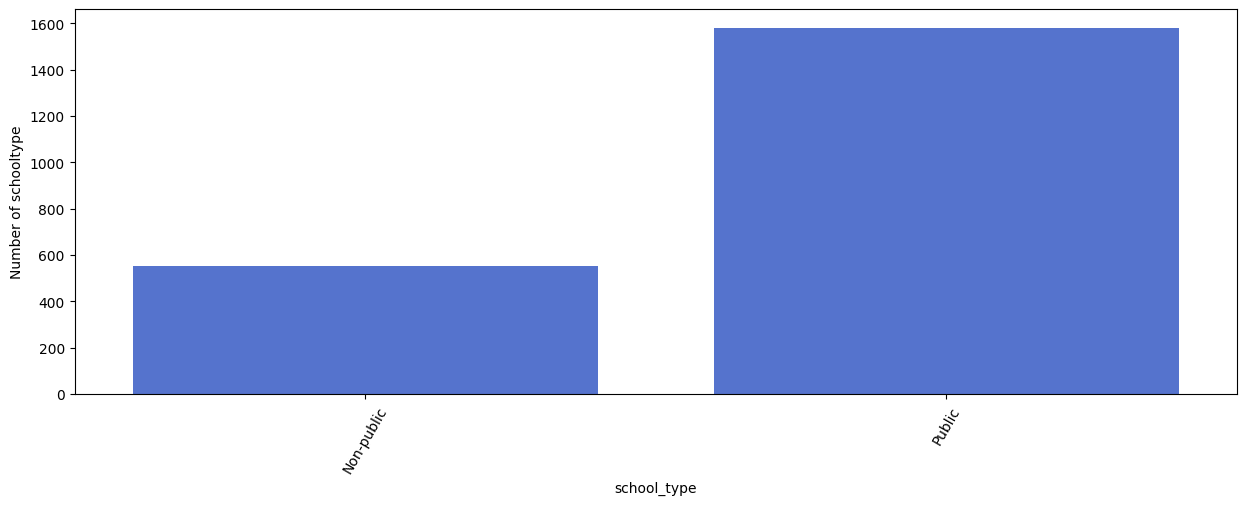

In [441]:
schooltype = df.groupby('school_type').count()[['lunch']].sort_values(by='lunch',ascending=True).reset_index()
schooltype = schooltype.rename(columns={'lunch':'Number of schooltype'})

fig = plt.figure(figsize=(15,5))
sns.barplot(x=schooltype['school_type'], y=schooltype['Number of schooltype'], color='royalblue')
plt.xticks(rotation=60)

(array([0, 1]), [Text(0, 0, 'Experimental'), Text(1, 0, 'Standard')])

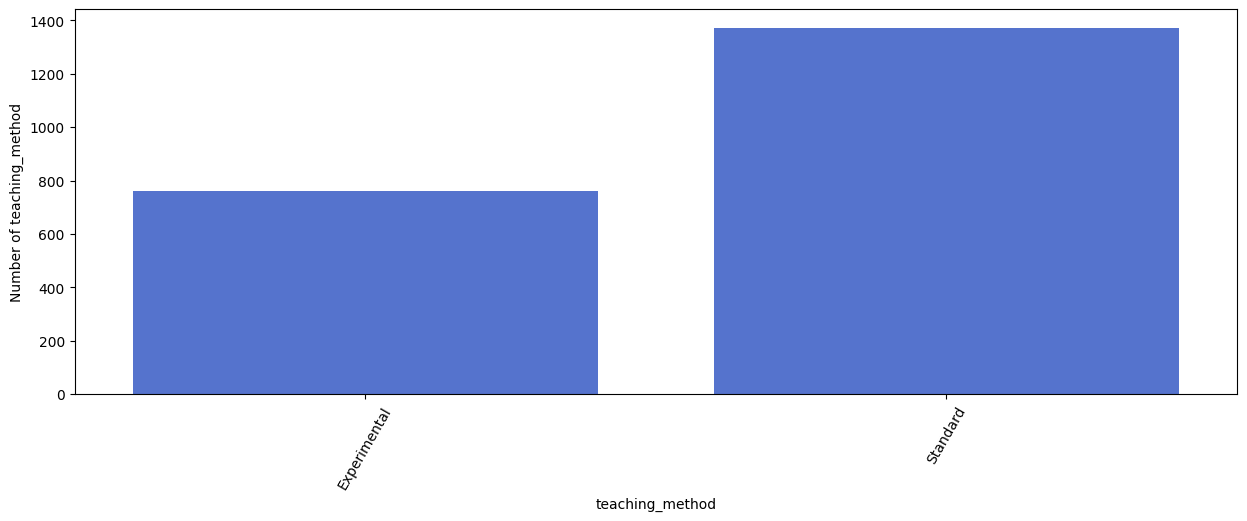

In [442]:
teaching = df.groupby('teaching_method').count()[['lunch']].sort_values(by='lunch',ascending=True).reset_index()
teaching = teaching.rename(columns={'lunch':'Number of teaching_method'})

fig = plt.figure(figsize=(15,5))
sns.barplot(x=teaching['teaching_method'], y=teaching['Number of teaching_method'], color='royalblue')
plt.xticks(rotation=60)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

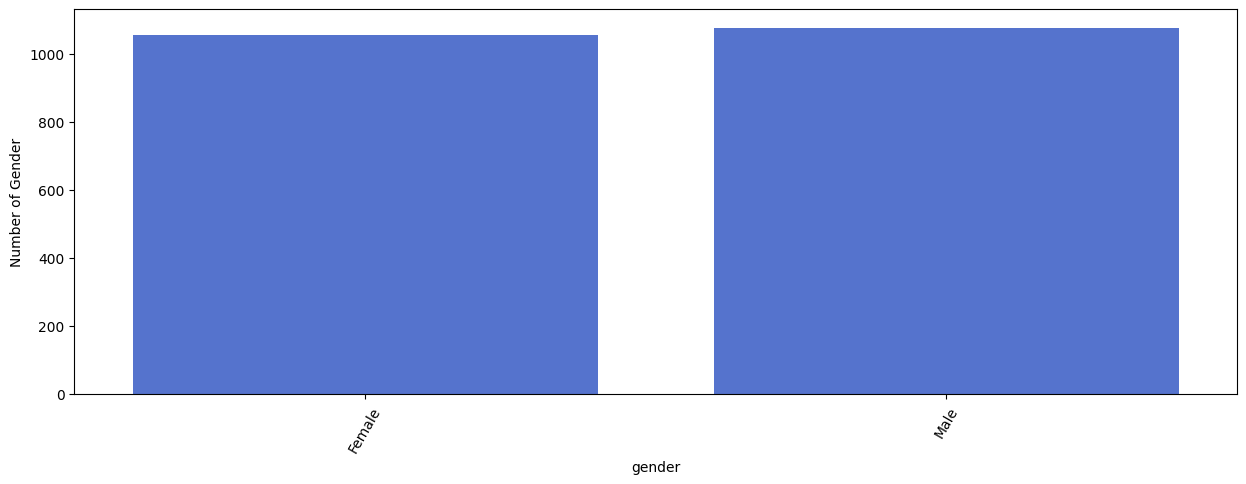

In [443]:
genders = df.groupby('gender').count()[['lunch']].sort_values(by='lunch',ascending=True).reset_index()
genders = genders.rename(columns={'lunch':'Number of Gender'})

fig = plt.figure(figsize=(15,5))
sns.barplot(x=genders['gender'], y=genders['Number of Gender'], color='royalblue')
plt.xticks(rotation=60)

(array([0, 1]),
 [Text(0, 0, 'Qualifies for reduced/free lunch'),
  Text(1, 0, 'Does not qualify')])

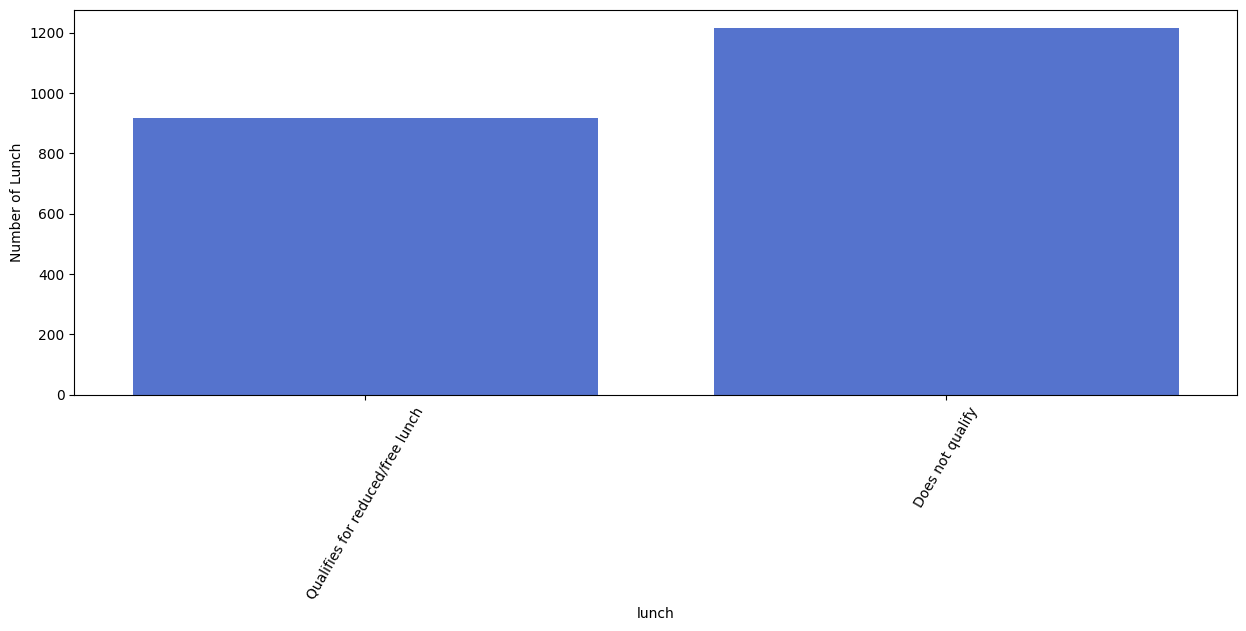

In [444]:
Lunch = df.groupby('lunch').count()[['pretest']].sort_values(by='pretest',ascending=True).reset_index()
Lunch = Lunch.rename(columns={'pretest':'Number of Lunch'})

fig = plt.figure(figsize=(15,5))
sns.barplot(x=Lunch['lunch'], y=Lunch['Number of Lunch'], color='royalblue')
plt.xticks(rotation=60)

<Axes: xlabel='pretest', ylabel='Count'>

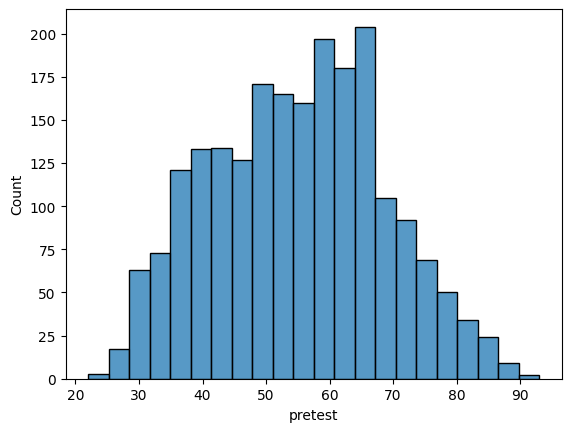

In [445]:
sns.histplot(df['pretest'])

<Axes: xlabel='posttest', ylabel='Count'>

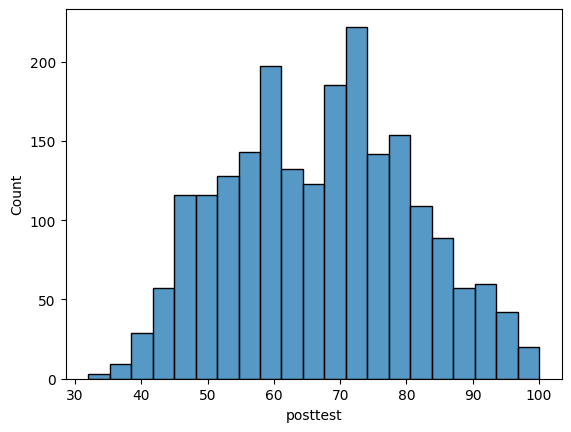

In [446]:
sns.histplot(df['posttest'])

In [447]:
pd.unique(df["school_setting"])


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [448]:
pd.unique(df["teaching_method"])

array(['Standard', 'Experimental'], dtype=object)

In [449]:
pd.unique(df["lunch"])

array(['Does not qualify', 'Qualifies for reduced/free lunch'],
      dtype=object)

In [450]:
pd.unique(df["school_type"])

array(['Non-public', 'Public'], dtype=object)

In [451]:
df.replace(('Urban', 'Suburban', 'Rural'), (1,2,3), inplace=True) #school setting
df.replace(('Female', 'Male'), (0,1), inplace=True) #gender
df.replace(('Standard', 'Experimental'), (1,2), inplace=True) #teaching method
df.replace(('Does not qualify', 'Qualifies for reduced/free lunch'), (1,2), inplace=True) #lunch
df.replace(('Non-public', 'Public'), (1,2), inplace=True) #school type
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1,1,6OL,1,20.0,2FHT3,0,1,62.0,72.0
1,ANKYI,1,1,6OL,1,20.0,3JIVH,0,1,66.0,79.0
2,ANKYI,1,1,6OL,1,20.0,3XOWE,1,1,64.0,76.0
3,ANKYI,1,1,6OL,1,20.0,556O0,0,1,61.0,77.0
4,ANKYI,1,1,6OL,1,20.0,74LOE,1,1,64.0,76.0


In [452]:
df = df.drop(['school', 'classroom', 'student_id','lunch'], axis=1)

# MODELLING

In [453]:
#SELEKSI FITUR
features = ['school_setting', 'school_type', 'teaching_method','n_student','gender','pretest']
x = df[features]
y = df['posttest']
x.shape, y.shape

((2133, 6), (2133,))

In [454]:
#SPLIT DATA TRAINING DAN DATA TESTING
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(534,)

In [455]:
#MEMBUAT MODEL REGRESI LINIER
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [456]:
#TESTING AKURASI MODEL
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score*100,"%")

akurasi model regresi linier =  94.78883975223388 %


# EVALUATION

In [459]:
df.head()

,school_setting,school_type,teaching_method,n_student,gender,pretest,posttest
0,1,1,1,20.0,0,62.0,72.0
1,1,1,1,20.0,0,66.0,79.0
2,1,1,1,20.0,1,64.0,76.0
3,1,1,1,20.0,0,61.0,77.0
4,1,1,1,20.0,1,64.0,76.0


In [457]:
# 'school_setting', 'school_type', 'teaching_method','n_student','gender','pretest'
# 1,1,1,20,0,62
# pretest = 72,0
input_data = np.array([[1,1,1,20,0,62]]) # type: ignore
prediction = lr.predict(input_data)
print('Estimasi Nilai Siswa :', prediction)

Estimasi Nilai Siswa : [72.01811444]


c:\Users\lizap\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# SAVE MODEL

In [458]:
import pickle

filename = 'estimasi_marks.sav'
pickle.dump(lr,open(filename,'wb'))